<a href="https://colab.research.google.com/github/Shivanissm/Youtube-AdView-Prediction/blob/main/Copy_of_Youtube_AdView_Prediction_Shivani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
path="/content/drive/MyDrive/Dataset/train.csv"
df=pd.read_csv(path)
df.head(5)

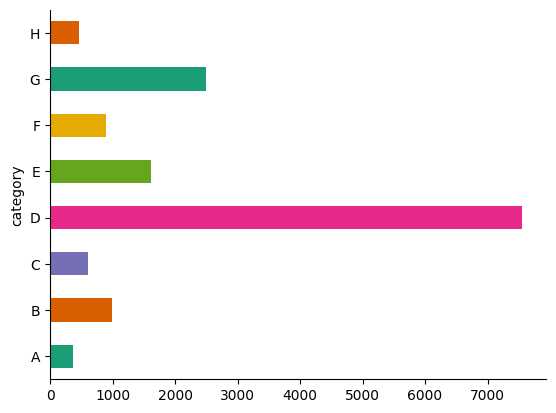

In [ ]:
# @title category

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

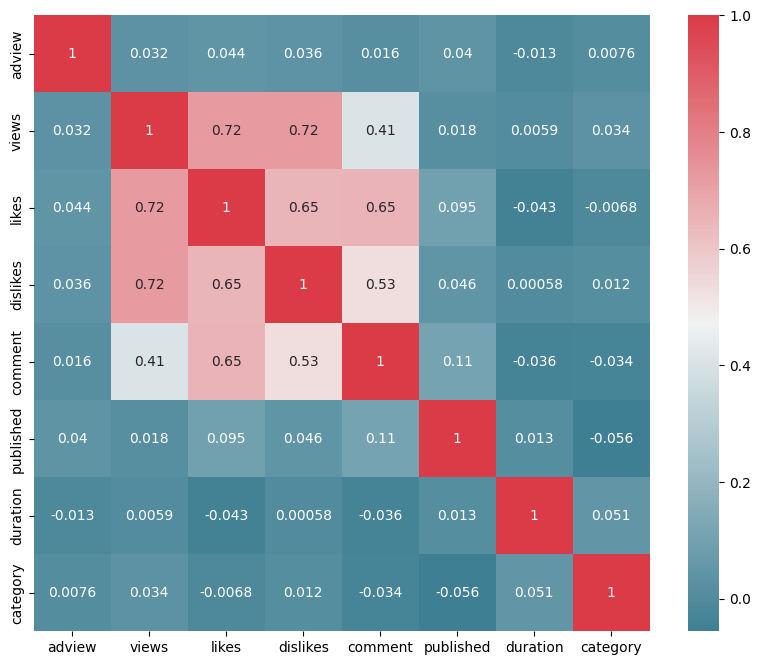

Linear Regression MSE: 10739451807.231947, MAE: 5448.75973790186
Support Vector Regressor MSE: 10771385739.513033, MAE: 3514.3093111396697
Decision Tree Regressor MSE: 10409391359.484667, MAE: 3791.1086666666665
Random Forest Regressor MSE: 10499304294.455956, MAE: 4282.322063333333
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 799444416.0000 - val_loss: 10769997824.0000
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 732196032.0000 - val_loss: 10764201984.0000
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 640070976.0000 - val_loss: 10760457216.0000
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1049285504.0000 - val_loss: 10759477248.0000
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 822949376.0000 - val_loss: 10758926336.0000
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 952073536.0000 - val_loss: 10758313984.0000
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 916162752.0000 - val_loss: 10758039552.0000
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 504860608.0000 - val_loss: 10757302272.0000
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 644955008.0000 - val_loss: 10757123072.0000
Epoch 10/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 662621376.000

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
import re
import joblib


data_train = pd.read_csv("train.csv")


data_train['views'] = pd.to_numeric(data_train['views'].str.replace('F', '').replace('', np.nan), errors='coerce')
data_train['likes'] = pd.to_numeric(data_train['likes'].str.replace('F', '').replace('', np.nan), errors='coerce')
data_train['dislikes'] = pd.to_numeric(data_train['dislikes'].str.replace('F', '').replace('', np.nan), errors='coerce')
data_train['comment'] = pd.to_numeric(data_train['comment'].str.replace('F', '').replace('', np.nan), errors='coerce')


data_train['views'].fillna(data_train['views'].mean(), inplace=True)
data_train['likes'].fillna(data_train['likes'].mean(), inplace=True)
data_train['dislikes'].fillna(data_train['dislikes'].mean(), inplace=True)
data_train['comment'].fillna(data_train['comment'].mean(), inplace=True)


data_train['adview'] = pd.to_numeric(data_train['adview'], errors='coerce')
data_train['adview'].fillna(data_train['adview'].mean(), inplace=True)

def convert_duration(duration):
    pattern = re.compile(r'PT(\d+H)?(\d+M)?(\d+S)?')
    matches = pattern.match(duration)
    hours = int(matches.group(1)[:-1]) if matches.group(1) else 0
    minutes = int(matches.group(2)[:-1]) if matches.group(2) else 0
    seconds = int(matches.group(3)[:-1]) if matches.group(3) else 0
    return hours * 3600 + minutes * 60 + seconds


data_train['duration'] = data_train['duration'].apply(convert_duration)


labelencoder = LabelEncoder()
data_train['vidid'] = labelencoder.fit_transform(data_train['vidid'])
data_train['category'] = labelencoder.fit_transform(data_train['category'])
data_train['published'] = labelencoder.fit_transform(data_train['published'])


data_train = data_train.drop(['vidid'], axis=1)


plt.figure(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)
plt.show()

X = data_train.drop('adview', axis=1)
y = data_train['adview']


scaler = MinMaxScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, mae


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
mse_lin, mae_lin = evaluate_model(lin_reg, X_test, y_test)
print(f'Linear Regression MSE: {mse_lin}, MAE: {mae_lin}')


svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
mse_svr, mae_svr = evaluate_model(svr, X_test, y_test)
print(f'Support Vector Regressor MSE: {mse_svr}, MAE: {mae_svr}')


dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
mse_dt, mae_dt = evaluate_model(dt_reg, X_test, y_test)
print(f'Decision Tree Regressor MSE: {mse_dt}, MAE: {mae_dt}')


rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
mse_rf, mae_rf = evaluate_model(rf_reg, X_test, y_test)
print(f'Random Forest Regressor MSE: {mse_rf}, MAE: {mae_rf}')


ann = Sequential()
ann.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(1, activation='linear'))
ann.compile(optimizer='adam', loss='mean_squared_error')


ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


y_pred_ann = ann.predict(X_test)
mse_ann = mean_squared_error(y_test, y_pred_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
print(f'Artificial Neural Network MSE: {mse_ann}, MAE: {mae_ann}')


mse_models = {
    'Linear Regression': (mse_lin, mae_lin, lin_reg),
    'SVR': (mse_svr, mae_svr, svr),
    'Decision Tree': (mse_dt, mae_dt, dt_reg),
    'Random Forest': (mse_rf, mae_rf, rf_reg),
    'ANN': (mse_ann, mae_ann, ann)
}
best_model_name, (best_mse, best_mae, best_model) = min(mse_models.items(), key=lambda x: x[1][0])
print(f'The best model is {best_model_name} with MSE: {best_mse} and MAE: {best_mae}')


if best_model_name != 'ANN':
    joblib.dump(best_model, 'best_model.pkl')
else:
    best_model.save('best_model.h5')
